In [252]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [253]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Time_Series/AirPassengers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
#EDA on the time series data
data.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [255]:
data.shape

(144, 2)

In [256]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [258]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [260]:
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [261]:
del data['Month']

In [262]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [263]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

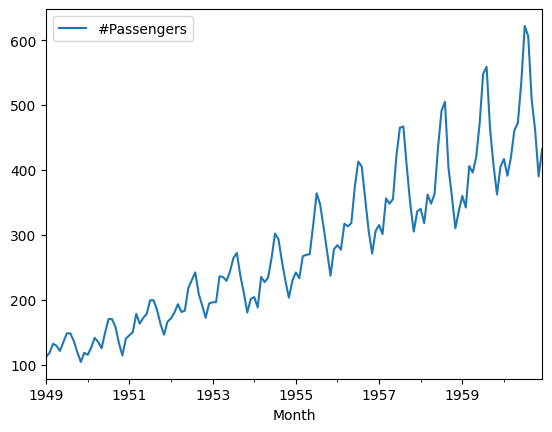

In [264]:
#plotting the time series
data.plot()

In [265]:
data.shape

(144, 1)

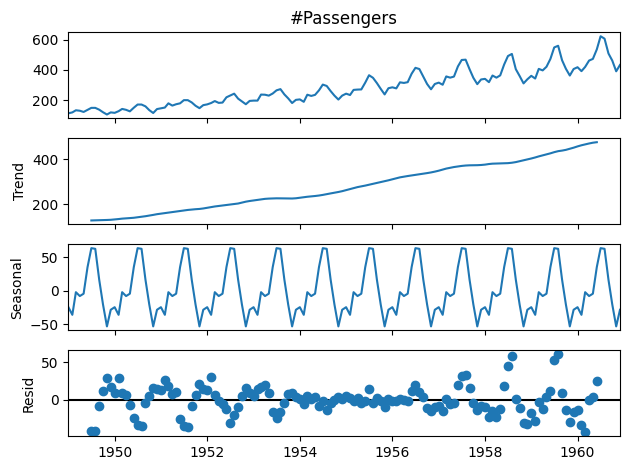

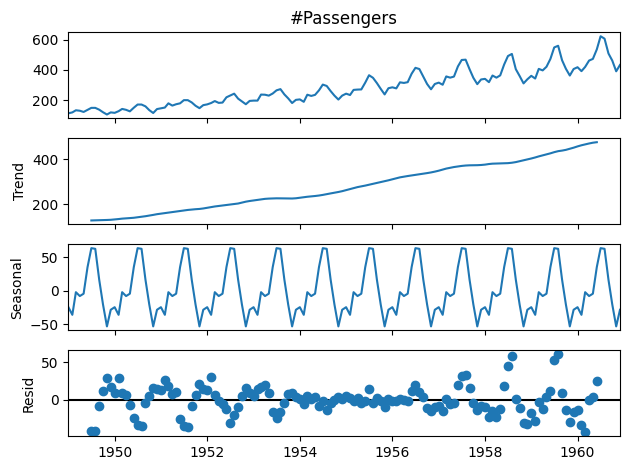

In [266]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].dropna())

decompose_result.plot()

In [267]:
mean_log = data.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Mean ')

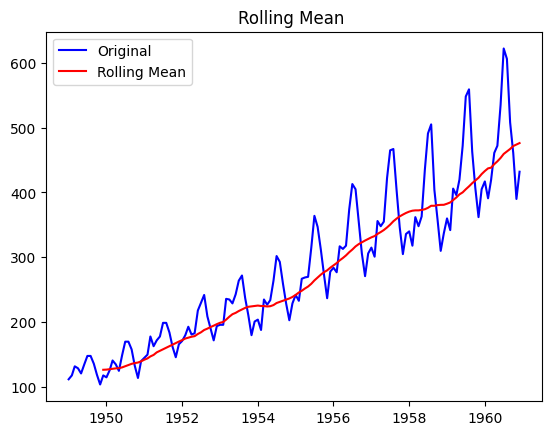

In [268]:

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models, which we will see shortly.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [269]:
# If p value less than 0.05 then time series is stationary

In [270]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result[1])

0.991880243437641


In [271]:
data['#Passengers'].diff().dropna()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [272]:
data['#Passengers'].head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [273]:
result = adfuller(data['#Passengers'].diff().dropna())
result[1]

0.05421329028382478

<Axes: xlabel='Month'>

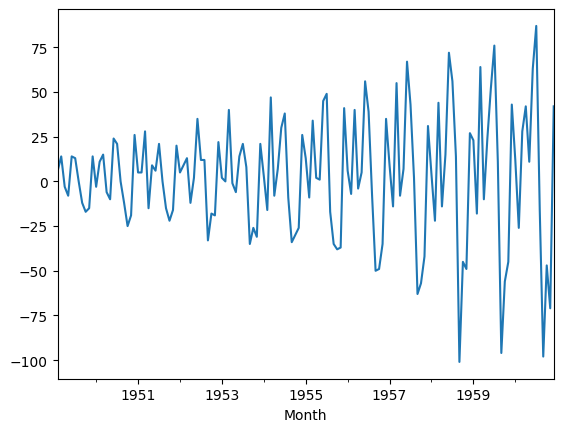

In [274]:
data['#Passengers'].diff().dropna().plot()

In [275]:
new_data = pd.DataFrame(data['#Passengers'].diff().dropna())

In [276]:
mean_log = new_data.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Mean ')

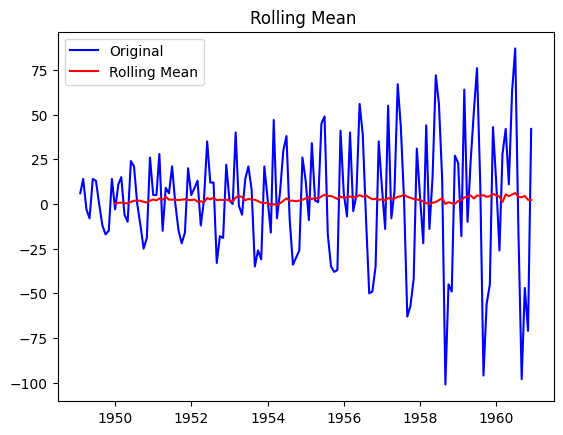

In [277]:

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

In [278]:
new_data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


If p value < 0.05 then time series is stationary else not stationary

In [279]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result[1])

0.05421329028382478


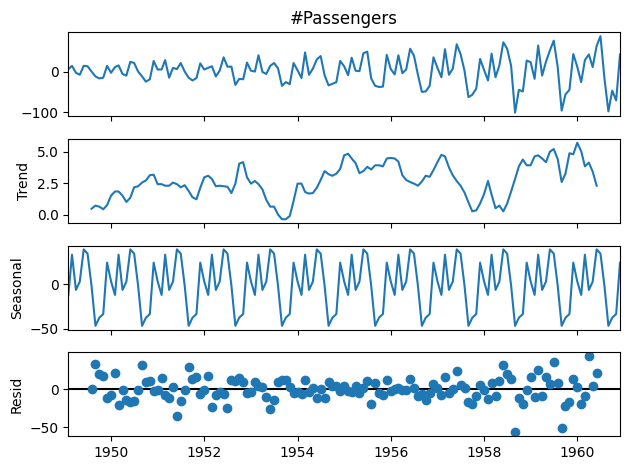

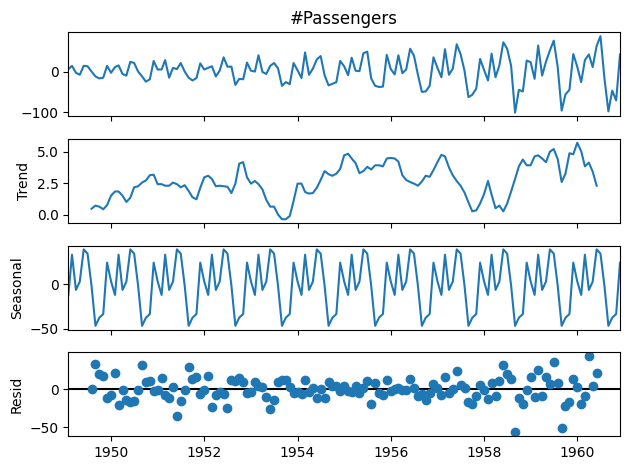

In [280]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

In [281]:
new_data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [282]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2)) #p=1,d=0,q=2
model_fit = model.fit()
# model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [283]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -552.820
Date:                Sun, 17 Sep 2023   AIC                           1115.640
Time:                        17:03:15   BIC                           1129.577
Sample:                    02-01-1949   HQIC                          1121.300
                         - 01-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4469      0.181     13.535      0.000       2.093       2.801
ar.L1          0.5296      0.090      5.894      0.000       0.353       0.706
ma.L1         -0.4404     17.477     -0.025      0.980     -34.694      33.814
ma.L2         -0.5595      9.779     -0.057      0.954     -19.726      18.607
sigma2       569.8725   9988.675      0.057      0.955    -1.9e+04    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.78   Prob(JB):                         0.73
Heteroskedasticity (H):               7.01   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [284]:
len(train)+len(test)- 1

141

In [285]:
new_data['predict'] = model_fit.predict(start= 2,
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']]

,#Passengers,predict
Month,,
1949-02-01,6.0,NaN
1949-03-01,14.0,NaN
1949-04-01,-3.0,3.881773
1949-05-01,-8.0,-1.389262
1949-06-01,14.0,0.415301
...,...,...
1960-08-01,-16.0,2.446863
1960-09-01,-98.0,2.446863
1960-10-01,-47.0,2.446863


<Axes: xlabel='Month'>

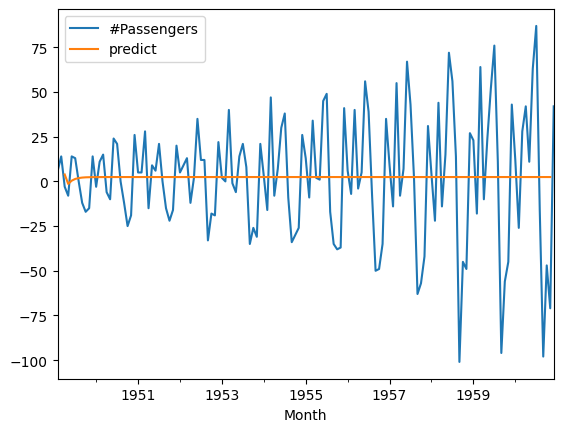

In [286]:
new_data[['#Passengers','predict']].plot()

In [287]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<ipython-input-288-64d90320d40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predict'] = model.predict(start= 2 ,


<Axes: xlabel='Month'>

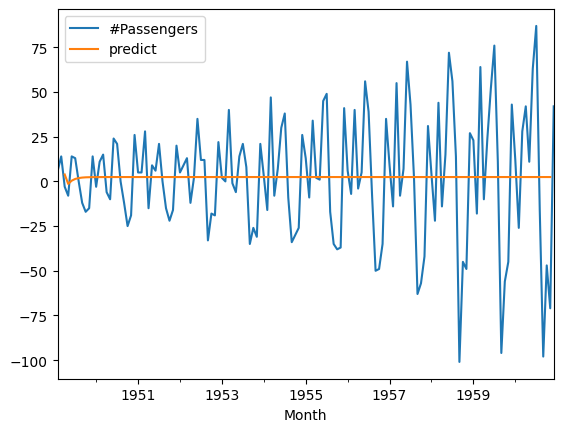

In [288]:
train['predict'] = model.predict(start= 2 ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

In [289]:
new_data.tail(20)

,#Passengers,predict
Month,,
1959-05-01,24.0,2.446863
1959-06-01,52.0,2.446863
1959-07-01,76.0,2.446863
1959-08-01,11.0,2.446863
1959-09-01,-96.0,2.446863
1959-10-01,-56.0,2.446863
1959-11-01,-45.0,2.446863
1959-12-01,43.0,2.446863
1960-01-01,12.0,2.446863


<Axes: xlabel='Month'>

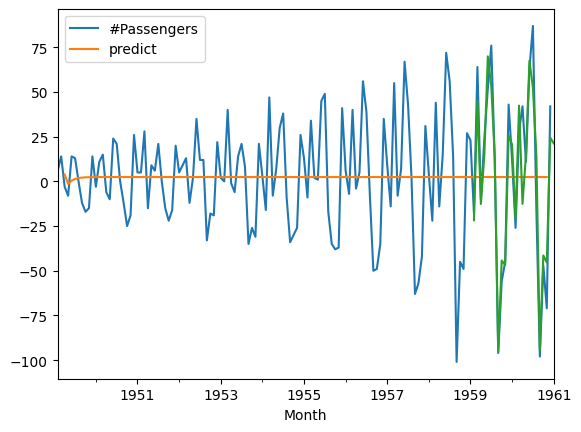

In [290]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
new_data.plot()
forecast.plot()

In [291]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = new_data[121:141]
mean_squared_error(predict_df['#Passengers'],predict_df['predict'])


2811.6194677814156

In [292]:
mean_absolute_percentage_error(predict_df['#Passengers'],predict_df['predict'])

0.9777285915976563

In [293]:
from statsmodels.tsa.arima.model import ARIMA

train = data.iloc[:120]['#Passengers']
test = data.iloc[121:]['#Passengers']

from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,1,2), seasonal_order=(1,1,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Month'>

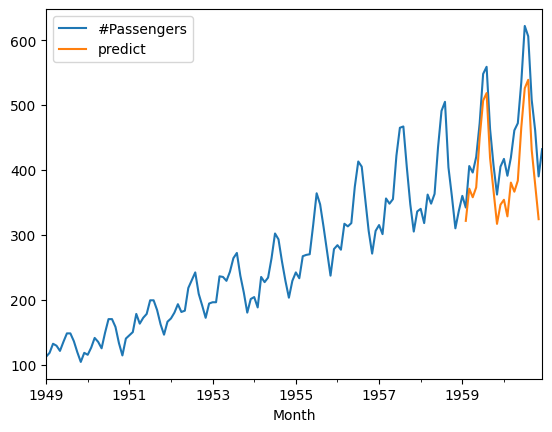

In [294]:
data['predict'] = model.predict(start= 121 ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

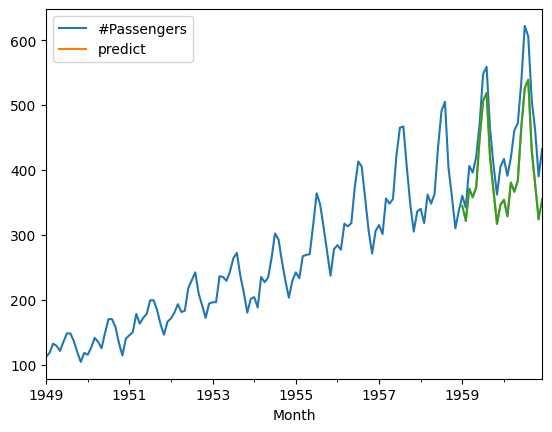

In [295]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
data.plot()
forecast.plot()

In [296]:
# from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.stattools import pacf
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf
# acf_plot=acf(new_data)
# pacf_plot=pacf(new_data)
# plot_acf(acf_plot)
# # plot_pacf(pacf_plot)